<a href="https://colab.research.google.com/github/Frasierzzz/DPDM2024/blob/main/Classification_(dpdm24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
# prompt: โหลด kdd99 dataset โดยใช้ sklearn

from sklearn.datasets import fetch_kddcup99

# Load the KDD99 dataset
kdd99 = fetch_kddcup99()

# Access the data and target
X = kdd99.data
y = kdd99.target

# Print some information about the dataset
print("Data shape:", X.shape)
print("Target shape:", y.shape)


Data shape: (494021, 41)
Target shape: (494021,)


In [ ]:
kdd99

{'data': array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        ...,
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object),
 'target': array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
        b'normal.'], dtype=object),
 'frame': None,
 'target_names': ['labels'],
 'feature_names': ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_s

## ตรวจการกระจายของ class

In [ ]:
# prompt: count number of unique class in y

import numpy as np

unique_classes = np.unique(y)
num_unique_classes = len(unique_classes)

print("Number of unique classes:", num_unique_classes)


Number of unique classes: 23


In [ ]:
# prompt: print all unique classes

print("Unique classes:", unique_classes)


Unique classes: [b'back.' b'buffer_overflow.' b'ftp_write.' b'guess_passwd.' b'imap.'
 b'ipsweep.' b'land.' b'loadmodule.' b'multihop.' b'neptune.' b'nmap.'
 b'normal.' b'perl.' b'phf.' b'pod.' b'portsweep.' b'rootkit.' b'satan.'
 b'smurf.' b'spy.' b'teardrop.' b'warezclient.' b'warezmaster.']


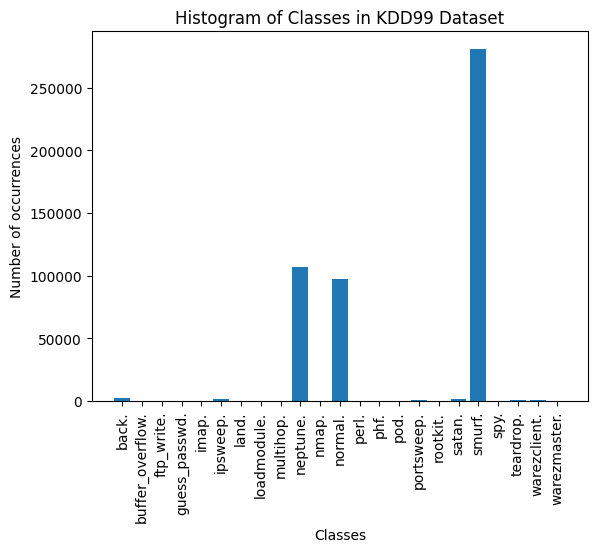

In [ ]:
# prompt: plot histogram of the unique classes

import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = np.bincount([np.where(unique_classes == label)[0][0] for label in y])

# Create a histogram
plt.bar(unique_classes, class_counts)
plt.xlabel("Classes")
plt.ylabel("Number of occurrences")
plt.title("Histogram of Classes in KDD99 Dataset")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
y

array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
       b'normal.'], dtype=object)

## Goal : 3-classes classifier (normal, neptune, smurf)

In [ ]:
# prompt: combine X and Y into pandas dataframe

import pandas as pd

# Assuming X and y are your data and target variables
df = pd.DataFrame(data=X, columns=kdd99.feature_names)
df['target'] = y

# Now df contains both your data and target variable in a pandas DataFrame
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [ ]:
# prompt: force convert data type of the target column to string

df['target'] = df['target'].astype(str)

In [ ]:
# prompt: extract 3 tables, one for target = normal, one for target neptune one for target smurf

normal_df = df[df['target'] == 'normal.']
neptune_df = df[df['target'] == 'neptune.']
smurf_df = df[df['target'] == 'smurf.']

print(normal_df.shape)
print(neptune_df.shape)
print(smurf_df.shape)

(97278, 42)
(107201, 42)
(280790, 42)


# Train & Test split

10% as a test

In [ ]:
# prompt: sampling 10% from each tables (normal_df,neptune_df,smurf_df) and concatenate them in to test dataframe and concatenate the rest into training dataframe

from sklearn.model_selection import train_test_split

# Sample 10% from each DataFrame
normal_train_df, normal_test_df = train_test_split(normal_df, test_size=0.1, random_state=42)
neptune_train_df, neptune_test_df = train_test_split(neptune_df, test_size=0.1, random_state=42)
smurf_train_df, smurf_test_df = train_test_split(smurf_df, test_size=0.1, random_state=42)

# Concatenate test DataFrames
test_df = pd.concat([normal_test_df, neptune_test_df, smurf_test_df])

# Concatenate train DataFrames
train_df = pd.concat([normal_train_df, neptune_train_df, smurf_train_df])


In [ ]:
normal_train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
87971,0,b'tcp',b'http',b'SF',322,7256,0,0,0,0,...,255,1.0,0.0,0.03,0.02,0.0,0.0,0.0,0.0,normal.
31908,0,b'udp',b'domain_u',b'SF',45,133,0,0,0,0,...,89,0.65,0.02,0.01,0.0,0.0,0.0,0.0,0.0,normal.
26943,0,b'tcp',b'http',b'SF',218,1653,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
344095,0,b'udp',b'domain_u',b'SF',33,0,0,0,0,0,...,11,0.09,0.04,0.09,0.0,0.0,0.0,0.0,0.0,normal.
85948,0,b'tcp',b'http',b'SF',319,410,0,0,0,0,...,255,1.0,0.0,0.04,0.01,0.0,0.0,0.0,0.0,normal.


In [ ]:
neptune_train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
468684,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,...,3,0.01,0.08,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
386768,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,15,0.06,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
479127,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,...,3,0.01,0.08,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
468776,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,...,3,0.01,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
358267,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,15,0.06,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.


In [ ]:
smurf_train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
414544,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
240179,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
165580,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
230241,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
413069,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


# Cross validation

In [ ]:
test_df.shape

(48528, 42)

In [ ]:
train_df.shape

(436741, 42)

# HW 3 แบ่ง fold โดยการสร้าง column ใหม่

## 3-fold cross validation

In [ ]:
import pandas as pd

In [ ]:
print(normal_train_df.shape[0])
print(neptune_train_df.shape[0])
print(smurf_train_df.shape[0])

87550
96480
252711


In [ ]:
num_of_fold = 3

In [ ]:
unique_classes_train = train_df['target'].unique()
print(unique_classes_train)

['normal.' 'neptune.' 'smurf.']


In [ ]:
# โคลนตาราง พร้อมสร้างคอลัมน์ใหม่ชื่อ fold โดยเอามาต่อท้ายคอลัมน์
new_df = train_df.copy()
new_df['fold'] = -1

In [104]:
# รันบน unique_classes_train
for class_label in unique_classes_train:
  # เอา index ของ class ที่รันมา
  class_index = new_df[new_df['target'] == class_label].index.tolist()
  # สลับตำแหน่ง index
  np.random.shuffle(class_index)
  # แบ่งออกเป็น 3 fold ด้วยมือ!
  fold_size = len(class_index) // num_of_fold
  fold_1_index = class_index[:fold_size]
  fold_2_index = class_index[fold_size:2 * fold_size]
  fold_3_index = class_index[2 * fold_size:]

  new_df.loc[fold_1_index, 'fold'] = 0
  new_df.loc[fold_2_index, 'fold'] = 1
  new_df.loc[fold_3_index, 'fold'] = 2

In [ ]:
new_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,fold
87971,0,b'tcp',b'http',b'SF',322,7256,0,0,0,0,...,1.0,0.0,0.03,0.02,0.0,0.0,0.0,0.0,normal.,1
31908,0,b'udp',b'domain_u',b'SF',45,133,0,0,0,0,...,0.65,0.02,0.01,0.0,0.0,0.0,0.0,0.0,normal.,0
26943,0,b'tcp',b'http',b'SF',218,1653,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,2
344095,0,b'udp',b'domain_u',b'SF',33,0,0,0,0,0,...,0.09,0.04,0.09,0.0,0.0,0.0,0.0,0.0,normal.,1
85948,0,b'tcp',b'http',b'SF',319,410,0,0,0,0,...,1.0,0.0,0.04,0.01,0.0,0.0,0.0,0.0,normal.,2


In [ ]:
new_df.groupby('fold')['target'].value_counts() # จำนวน class ในแต่ละ fold

fold  target  
0     smurf.      84237
      neptune.    32160
      normal.     29183
1     smurf.      84237
      neptune.    32160
      normal.     29183
2     smurf.      84237
      neptune.    32160
      normal.     29184
Name: count, dtype: int64